# Loading the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
file=pd.read_csv("Churn_Modelling.csv")
df=pd.DataFrame(file)
df.head()
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')
df = df.drop(columns=['RowNumber', 'Surname'])
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Perform Visualizations

# UNIVARIENT ANALYSIS

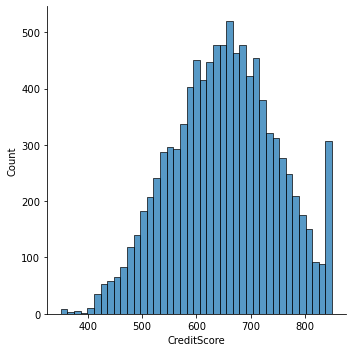

In [3]:
sns.displot(df["CreditScore"])

<AxesSubplot:>

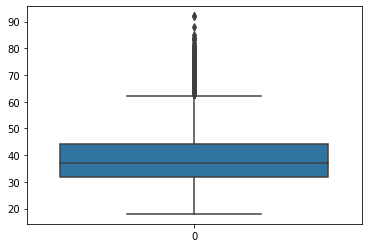

In [15]:
sns.boxplot(data=df["Age"])

# BI-VARIATE ANALYSIS

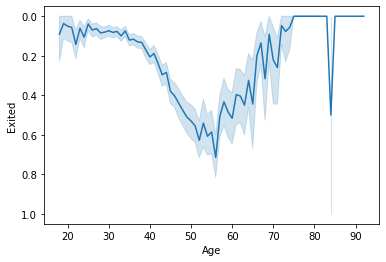

In [33]:
sns.lineplot(data=df, x='Age' ,y="Exited");

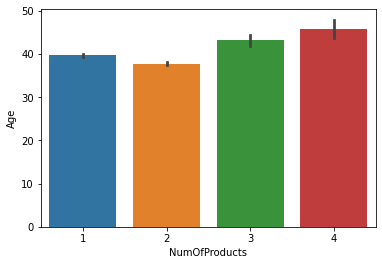

In [36]:
sns.barplot(data=df, x='NumOfProducts' ,y="Age");

# Perform descriptive statistics on the dataset.

In [52]:
df[['CreditScore', 'Balance', 'EstimatedSalary']].median()

CreditScore           652.000
Balance             97198.540
EstimatedSalary    100193.915
dtype: float64

In [53]:
df[['CreditScore', 'Balance', 'EstimatedSalary']].mode()

,CreditScore,Balance,EstimatedSalary
0,850,0.0,24924.92


In [54]:
df[['CreditScore', 'Balance', 'EstimatedSalary']].max()

CreditScore           850.00
Balance            250898.09
EstimatedSalary    199992.48
dtype: float64

In [55]:
df[['CreditScore', 'Balance', 'EstimatedSalary']].skew()

CreditScore       -0.071607
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [56]:
df[['CreditScore', 'Balance', 'EstimatedSalary']].min()

CreditScore        350.00
Balance              0.00
EstimatedSalary     11.58
dtype: float64

In [59]:
df[['CreditScore', 'Balance', 'EstimatedSalary']].std()

CreditScore           96.653299
Balance            62397.405202
EstimatedSalary    57510.492818
dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  object  
 3   Gender           10000 non-null  object  
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  category
 9   IsActiveMember   10000 non-null  category
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 732.9+ KB


In [58]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


# Handle the Missing values

In [60]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [68]:
df.isnull()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
df.isnull().any()

CustomerId         False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [75]:
df.isnull().mean()

CustomerId         0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

# Find the outliers and replace the outliers

In [76]:
qnt=df.quantile(q=(0.25,0.75))

In [77]:
qnt

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0.25,15628528.25,584.0,32.0,3.0,0.00,1.0,51002.1100
0.75,15753233.75,718.0,44.0,7.0,127644.24,2.0,149388.2475


In [82]:
iqr=qnt.loc[0.75]-qnt.loc[0.25]
iqr

CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
EstimatedSalary     98386.1375
dtype: float64

In [83]:
upper = qnt.loc[0.75] + 1.5 * iqr

In [84]:
upper

CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
EstimatedSalary    2.969675e+05
dtype: float64

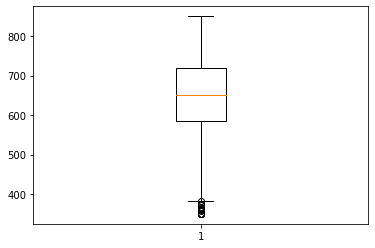

In [117]:
plt.boxplot(df["CreditScore"])
plt.show()


In [120]:
print(df['Age'].quantile(0.50)) 
print(df['Age'].quantile(0.95)) 
df['Age'] = np.where(df['Age'] > 325, 140, df['Age'])
df.describe()

70.0
70.0


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,140.0,68.417500,5.012800,76485.889288,1.530200,100090.239881
std,7.193619e+04,0.0,4.830148,2.892174,62397.405202,0.581654,57510.492818
min,1.556570e+07,140.0,50.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,140.0,70.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,140.0,70.000000,5.000000,97198.540000,1.000000,100193.915000
75%,1.575323e+07,140.0,70.000000,7.000000,127644.240000,2.000000,149388.247500
max,1.581569e+07,140.0,92.000000,10.000000,250898.090000,4.000000,199992.480000


# Check for Categorical columns and perform encoding

In [124]:
df.head(4)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,140,France,Female,70,2,0.00,1,1,1,101348.88,1
1,15647311,140,Spain,Female,70,1,83807.86,1,0,1,112542.58,0
2,15619304,140,France,Female,70,8,159660.80,3,1,0,113931.57,1
3,15701354,140,France,Female,70,1,0.00,2,0,0,93826.63,0


In [131]:
df["Gender"].replace({"Female":1,"Male":2},inplace = True)
df["Geography"].replace({"France":1,"Spain":2,"Germany":3},inplace = True)

In [130]:
df.head(7)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,140,1,0,70,2,0.00,1,1,1,101348.88,1
1,15647311,140,2,0,70,1,83807.86,1,0,1,112542.58,0
2,15619304,140,1,0,70,8,159660.80,3,1,0,113931.57,1
3,15701354,140,1,0,70,1,0.00,2,0,0,93826.63,0
4,15737888,140,2,0,70,2,125510.82,1,1,1,79084.10,0
5,15574012,140,2,1,70,8,113755.78,2,1,0,149756.71,1
6,15592531,140,1,1,50,7,0.00,2,1,1,10062.80,0


# Split the data into dependent and independent variables

In [138]:
X= df.iloc[:,3:-1]
y=df.iloc[:,-1]
X.head(11)

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,70,2,0.00,1,1,1,101348.88
1,0,70,1,83807.86,1,0,1,112542.58
2,0,70,8,159660.80,3,1,0,113931.57
3,0,70,1,0.00,2,0,0,93826.63
4,0,70,2,125510.82,1,1,1,79084.10
5,1,70,8,113755.78,2,1,0,149756.71
6,1,50,7,0.00,2,1,1,10062.80
7,0,70,4,115046.74,4,1,0,119346.88
8,1,70,4,142051.07,2,0,1,74940.50
9,1,70,2,134603.88,1,1,1,71725.73


In [162]:
X = df.iloc[:,3:10].values

In [163]:
print(X)

[[ 0. 70.  2. ...  1.  1.  1.]
 [ 0. 70.  1. ...  1.  0.  1.]
 [ 0. 70.  8. ...  3.  1.  0.]
 ...
 [ 0. 70.  7. ...  1.  0.  1.]
 [ 1. 70.  3. ...  2.  1.  0.]
 [ 0. 70.  4. ...  1.  1.  0.]]


# Scale the independent variables

In [160]:
names=df.columns
names

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [164]:
from sklearn.preprocessing import scale

In [166]:
X=scale(X)

In [167]:
X

array([[-1.09598752,  0.32764612, -1.04175968, ..., -0.91158349,
         0.64609167,  0.97024255],
       [-1.09598752,  0.32764612, -1.38753759, ..., -0.91158349,
        -1.54776799,  0.97024255],
       [-1.09598752,  0.32764612,  1.03290776, ...,  2.52705662,
         0.64609167, -1.03067011],
       ...,
       [-1.09598752,  0.32764612,  0.68712986, ..., -0.91158349,
        -1.54776799,  0.97024255],
       [ 0.91241915,  0.32764612, -0.69598177, ...,  0.80773656,
         0.64609167, -1.03067011],
       [-1.09598752,  0.32764612, -0.35020386, ..., -0.91158349,
         0.64609167, -1.03067011]])

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
sc = StandardScaler()
df = sc.fit_transform(df)
df = sc.fit_transform(df)
df = pd.DataFrame(df)

In [174]:
df.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.783213,0.0,-0.902587,-1.095988,0.327646,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.606534,0.0,0.301665,-1.095988,0.327646,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-0.995885,0.0,-0.902587,-1.095988,0.327646,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.144767,0.0,-0.902587,-1.095988,0.327646,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,0.652659,0.0,0.301665,-1.095988,0.327646,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
5,-1.625530,0.0,0.301665,0.912419,0.327646,1.032908,0.597329,0.807737,0.646092,-1.030670,0.863650,1.977165


# Split the data into training and testing

In [210]:
import numpy as np

In [230]:
from sklearn.model_selection import train_test_split
X,y= np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [231]:
list(y)

[0, 1, 2, 3, 4]